# dataset_velocidade.csv

Um projeto ambicioso de controle de um carro autônomo está tentando
implementar um complexo controle do veículo em diferentes cenários. O projeto
consiste em fazer o controle da rota do carro para investigar os desafios e o
desempenho da equipe de engenharia envolvida.

Para isso, foi desenvolvido um programa que faz o controle do veículo
baseado nas imagens das câmeras que o mesmo possui. Diversos algoritmos
de IA foram implementados e o carro finalmente está conseguindo seguir as
rotas desejadas. Entretanto, notou-se que o veículo está indo com uma
velocidade muito alta em alguns pontos das rotas, como por exemplo em ruas
não pavimentadas, o que poderia fazer o carro danificar a sua suspensão.

Para resolver esse problema, seu grupo sugeriu o uso de Aprendizado de
Máquina para auxiliar no controle de velocidade de acordo com alguns sensores
do veículo. Dessa forma, o algoritmo de controle do veículo pode receber uma
velocidade sugerida para cada trecho que ele está percorrendo e ajustar sua
velocidade.

Para isso, vocês fizeram um conjunto de testes com pilotos experientes
em que foram coletados os seguintes atributos:

Dados coletados a partir do sistema de visão computacional:
* road: tipo de rua com a qual o carro estava se locomovendo
Dados coletados do acelerômetro e do girocóptero instalados no
veículo:
* acc_x_dashboard: Aceleração no eixo x em m/s²
* acc_y_dashboard: Aceleração no eixo y em m/s²
* acc_z_dashboard: Aceleração no eixo z em m/s²
* gyro_x_dashboard: Rotação no eixo x em deg/s
* gyro_y_dashboard: Rotação no eixo y em deg/s
* gyro_y_dashboard: Rotação no eixo z em deg/s
* temp_dashboard: Temperatura no veículo graus Celcius;

Dados coletados do veículo (target - saída do modelo):

* speed: Velocidade do carro em m/s

Após essa etapa de testes seu grupo está com o "dataset_velocidade.csv"
em mãos e pode aplicar os conceitos de Aprendizado de Máquina para tentar
criar um modelo que irá ajudar o veículo a fazer um controle de sua velocidade
baseado no movimento do carro e no tipo de rua em que ele se encontra.


# 1) Carregar os dados

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# abrindo e exibindo o data set "dataset_velocidade.csv"
df_raw = pd.read_csv('/content/dataset_velocidade.csv', encoding='UTF-8', sep=',')
df_raw.head(120000)

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved
...,...,...,...,...,...,...,...,...,...,...
119995,1.0,-0.367014,-0.180032,9.376394,-0.366211,-1.532206,-0.295313,32.261868,19.562754,paved
119996,1.0,0.650522,0.064176,9.409913,-1.342773,-1.318583,-0.219019,32.309791,19.562754,paved
119997,1.0,0.722348,-0.072293,9.081908,-1.251221,-0.647196,-0.264796,32.166023,19.562754,paved
119998,1.0,0.298574,-0.448183,9.467374,-0.854492,-0.921854,-0.173243,32.309791,19.562754,paved


# 2) Análise exploratória e tratamento de dados

Faremos o tratamento tanto de dados nulos, quanto de NaN. 
Começaremos pela coluna "no_speed_bump", a princípio, pela pequena quantidade exibida no dataset, pressupõe-se que é composta apenas de valores faltantes e iguais a 1. Para isso, com os resultados do comando '.describe()', sua média deve ser exatamente igual a 1 (visto que o valor NaN não entra para a conta).

In [ ]:
df_raw.describe()

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
count,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000,123437.000000
mean,0.983903,0.617630,-0.240425,9.828602,0.018676,-0.074961,-0.197090,32.829623,9.238824
std,0.125850,1.434470,1.963395,1.704215,3.476104,5.409665,3.578210,0.417881,6.298133
min,0.000000,-8.710806,-13.290681,-3.705523,-35.766602,-69.159159,-23.091944,0.000000,0.005860
25%,1.000000,-0.091680,-1.164049,9.084302,-1.220703,-1.959452,-1.516017,32.501483,4.586517
50%,1.000000,0.521235,-0.206369,9.824110,0.000000,-0.052103,-0.081690,32.789020,6.692151
75%,1.000000,1.326884,0.590901,10.595043,1.266479,1.824728,1.261083,33.172402,15.029036
max,1.000000,13.957495,18.276868,24.024120,44.708252,62.432638,22.165624,33.843322,21.592090


Pode-se observar que a média deu aproximadamente 0.98, ou seja, a coluna "no_speed_bump" é vastamente composta por números iguais a 1 e uma pequena quantidade igual a 0 (valores NaN não entram nessa conta!)

In [ ]:
# comando para ver a quantidade de valores faltantes em todo o dataset
df_raw.isnull().sum()

no_speed_bump       1247
acc_x_dashboard     1247
acc_y_dashboard     1247
acc_z_dashboard     1247
gyro_x_dashboard    1247
gyro_y_dashboard    1247
gyro_z_dashboard    1247
temp_dashboard      1247
speed               1247
road                   0
dtype: int64

In [ ]:
# comando para ver a quantidade de valores iguais a zero em todo o dataset
df_raw.isin([0]).sum()

no_speed_bump       1987
acc_x_dashboard        2
acc_y_dashboard        2
acc_z_dashboard        2
gyro_x_dashboard    1039
gyro_y_dashboard       2
gyro_z_dashboard       2
temp_dashboard         2
speed                  0
road                   0
dtype: int64

O valor 0 faz sentido estar presente na coluna "no_speed_bump", sendo 1 igual a "não tem lombada" e 0, "tem lombada", com isso, apenas falta tratar dos dados NaN. Entretanto, há um impasse: com qual valor preencher esses valores faltantes? 1 ou 0? A suposição seria substituir com 1, justamente por ser uma coisa faltante, mas isso não é uma certeza e, para isso, devemos fazer e analisar algumas coisas.

In [ ]:
# tirar a media de cada coluna de acordo com o tipo de estrada
road_raw_mean = df_raw.drop(columns=['no_speed_bump']).groupby('road').mean().sort_values(by = 'speed', ascending=False)
road_raw_mean.head()

,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
road,,,,,,,,
asphalt,0.514057,-0.263484,9.824061,0.037510,-0.052077,-0.120960,32.726167,13.838838
paved,0.501764,-0.172332,9.827872,0.036566,-0.063805,-0.271413,32.833376,11.743367
cobblestone,0.458877,0.139804,9.786915,0.173588,-0.541779,-0.923684,33.128025,6.569799
unpaved,0.825555,-0.361434,9.831771,-0.017823,-0.090419,-0.064278,32.823100,4.741807
dirt,0.835397,-0.498504,9.671255,0.360583,-0.348698,0.087464,32.814889,4.689771


Com os cálculos acima, todos os valores NaN do dataset (exceto a coluna no_speed_bump), serão preenchidos com a sua média em cada tipo de asfalto de cada coluna. Isso será feito para, logo em seguida, dar sequência no tratamento dos valores faltantes do "no_speed_bump"

Porém surge uma preocupação: será que a mudança desses valores faltantes vai impactar muito no dataset como um todo?

In [ ]:
# biblioteca para ver um gráfico de dados faltantes
import missingno as msno

Text(0.5, 1.0, 'Terra')

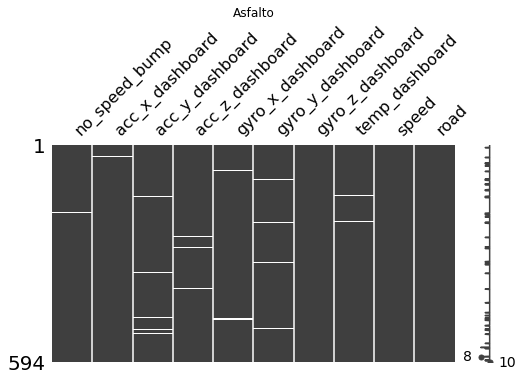

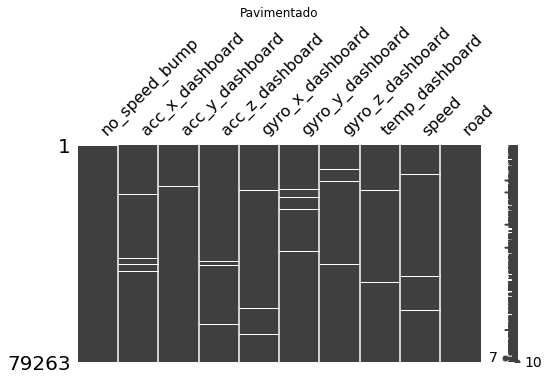

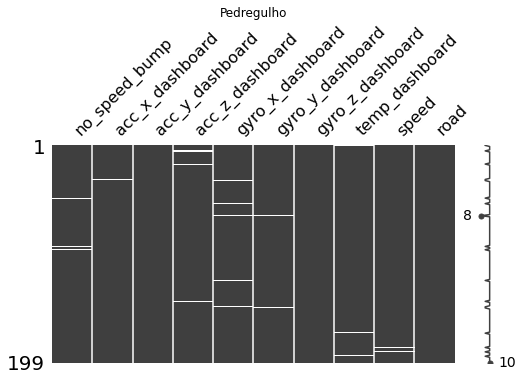

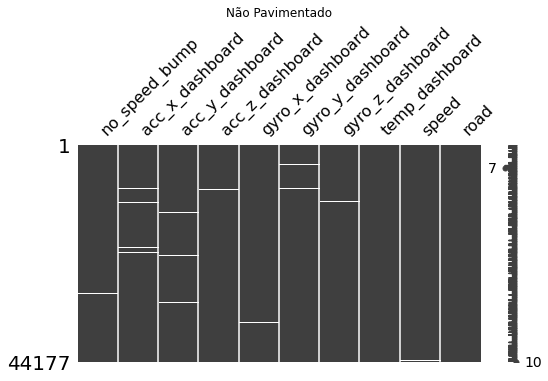

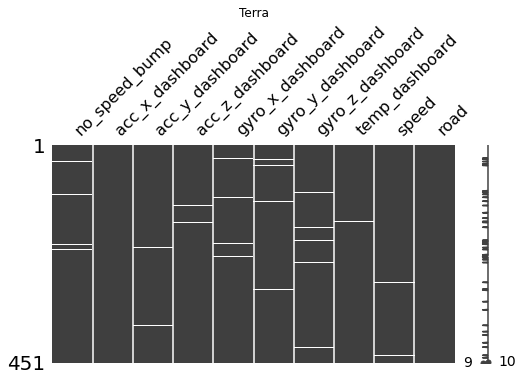

In [ ]:
msno.matrix(df_raw[df_raw['road']=='asphalt'], figsize=(8,4))
plt.title('Asfalto')

msno.matrix(df_raw[df_raw['road']=='paved'], figsize=(8,4))
plt.title('Pavimentado')

msno.matrix(df_raw[df_raw['road']=='cobblestone'], figsize=(8,4))
plt.title('Pedregulho')

msno.matrix(df_raw[df_raw['road']=='unpaved'], figsize=(8,4))
plt.title('Não Pavimentado')

msno.matrix(df_raw[df_raw['road']=='dirt'], figsize=(8,4))
plt.title('Terra')

(Esse gráfico servirá de apoio também para futuros tratamentos!)

No gráfico acima, observamos que as barras pretas são dados não nulos, enquanto que as linhas brancas (cortes) são as informações faltantes em cada tipo de rua e a quantidade total de linhas fica no canto inferior esquerdo. Com isso, é possível perceber que nenhum tratamento do dataset vai conseguir mudar drasticamente seus resultados finais.

# 2.1) Tratando uma parte dos dados

In [ ]:
# separando as colunas e os tipos de rua para auxiliar no proximo codigo
columns_name = ['acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard', 'gyro_x_dashboard', 'gyro_y_dashboard', 'gyro_z_dashboard', 'temp_dashboard', 'speed']
roads_type = ['asphalt', 'paved', 'cobblestone', 'unpaved', 'dirt']

In [ ]:
# comando para substituir os valores NaN pela sua respectiva media de coluna e tipo de rua (exceto no_speed_bump)
numbers = []

df_v1 = df_raw.copy()

for idx, rows in road_raw_mean.iterrows():
  my_list = [rows.acc_x_dashboard, rows.acc_y_dashboard, rows.acc_z_dashboard,
             rows.gyro_x_dashboard, rows.gyro_y_dashboard, rows.gyro_z_dashboard,
             rows.temp_dashboard, rows.speed]
  numbers.append(my_list)

for i in roads_type:
    for k in numbers:
        for j in columns_name:
            for w in k:
                df_v1.update(df_v1[df_v1['road']==i][j].fillna(w))
                del k[0]
                break
        if not k:
            numbers = [x for x in numbers if x]
            break

In [ ]:
# ver os dados faltantes
df_v1.isnull().sum()

no_speed_bump       1247
acc_x_dashboard        0
acc_y_dashboard        0
acc_z_dashboard        0
gyro_x_dashboard       0
gyro_y_dashboard       0
gyro_z_dashboard       0
temp_dashboard         0
speed                  0
road                   0
dtype: int64

Em seguida, daremos sequência ao valor final de NaN do "no_speed_bump", criando um dataframe ao selecionar somente os valores faltantes.

In [ ]:
# selecionando somente as linhas com algum tipo de NaN
df_bump_nan = df_v1[df_v1.isnull().any(axis=1)]
df_bump_nan

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
100,NaN,0.016059,0.006715,9.816928,0.152588,-0.036844,-0.142726,32.357714,0.010822,paved
128,NaN,0.001693,0.011504,9.809745,0.091553,-0.097880,-0.142726,32.309791,0.010822,paved
134,NaN,-0.005489,0.056994,9.781015,-0.061035,-0.006327,0.040380,32.357714,0.010822,paved
163,NaN,-0.015066,0.006715,9.682852,0.061035,-0.036844,-0.173243,32.309791,0.010822,paved
...,...,...,...,...,...,...,...,...,...,...
124280,NaN,0.499687,-0.347626,10.180846,0.091553,0.146261,-0.325831,31.974331,0.023570,paved
124323,NaN,0.415890,-0.358400,9.929455,0.244141,0.237814,-0.051173,32.285830,0.023570,paved
124556,NaN,0.351247,-0.414664,9.867206,-0.152588,-0.097880,-0.020655,31.926408,0.023570,paved
124586,NaN,0.310545,-0.565499,9.546383,-0.091553,-0.097880,0.040380,32.309791,0.023570,paved


Preencheremos a coluna "no_speed_bump" com o número 2 para depois fazer a comparação com 1(sem lombada) ou 0(com lombada).

In [ ]:
df_bump_nan.update(df_bump_nan['no_speed_bump'].fillna(2))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:7511: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [ ]:
print(df_bump_nan.groupby('no_speed_bump').mean().sort_values(by = 'speed', ascending=False))

               acc_x_dashboard  acc_y_dashboard  acc_z_dashboard  \
no_speed_bump                                                      
2.0                   0.618784        -0.082757         9.794836   

               gyro_x_dashboard  gyro_y_dashboard  gyro_z_dashboard  \
no_speed_bump                                                         
2.0                    0.043336          0.063595         -0.079096   

               temp_dashboard     speed  
no_speed_bump                            
2.0                 32.827849  9.254127  


Agora, vamos comparar com a outra tabela focando na coluna "speed" (pois pela logica o "no_speed_bump" afeta diretamente a velocidade).

In [ ]:
print(df_raw.groupby('no_speed_bump').mean().sort_values(by = 'speed', ascending=False))

               acc_x_dashboard  acc_y_dashboard  acc_z_dashboard  \
no_speed_bump                                                      
1.0                   0.619574        -0.240638         9.829007   
0.0                   0.498244        -0.327493         9.825254   

               gyro_x_dashboard  gyro_y_dashboard  gyro_z_dashboard  \
no_speed_bump                                                         
1.0                    0.016616         -0.079721         -0.195486   
0.0                    0.128693          0.128011         -0.370061   

               temp_dashboard     speed  
no_speed_bump                            
1.0                 32.823391  9.309583  
0.0                 33.210170  4.899666  


Ao fazer essa comparação, notamos que os valores faltantes NaN se assemelham mais com o 1 do que o 0. (1 sem lombada = velocidade maior; 0 com lombada = velocidade menor).

In [ ]:
# preenchendo os NaN da coluna "no_speed_bump" com o numero 1
df_v1.update(df_v1['no_speed_bump'].fillna(1))

In [ ]:
# conferir novamente se há mais algum dado faltante
df_v1.isnull().sum()

no_speed_bump       0
acc_x_dashboard     0
acc_y_dashboard     0
acc_z_dashboard     0
gyro_x_dashboard    0
gyro_y_dashboard    0
gyro_z_dashboard    0
temp_dashboard      0
speed               0
road                0
dtype: int64

# 2.2) Visualizando outliers

Agora que terminamos de tratar os valores faltantes, falta observar se o dataset possui outliers e como boa prática, faremos o devido tratamento deles.

Antes de fazer qualquer modificação no dataset, veremos se, ao alterar essa quantidade, inviabiliza ou não os dados. Para isso, compararemos a quantidade de outliers em relação a quantidade total de dados (lá naquele gráfico msno.matrix do começo).

Vemos que a quantidade de outliers é muito inferior à quantidade total de dados. Mudar ou não esses outliers não vai fazer diferença, mas como boa prática, faremos isso em breve.

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
asphalt = df_v1[df_v1['road']=='asphalt']
paved = df_v1[df_v1['road']=='paved']
cobblestone = df_v1[df_v1['road']=='cobblestone']
unpaved = df_v1[df_v1['road']=='unpaved']
dirt = df_v1[df_v1['road']=='dirt']

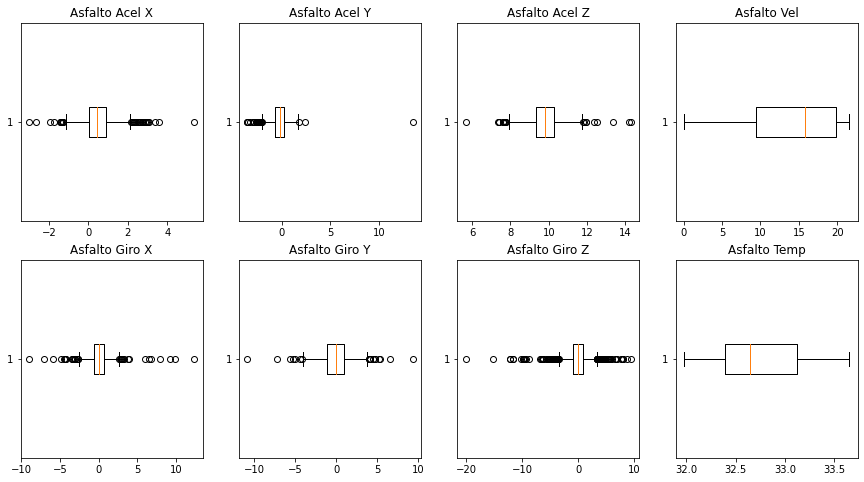

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(15,8))

ax1.boxplot(asphalt['acc_x_dashboard'], vert=False)
ax1.set_title('Asfalto Acel X')

ax2.boxplot(asphalt['acc_y_dashboard'], vert=False)
ax2.set_title('Asfalto Acel Y')

ax3.boxplot(asphalt['acc_z_dashboard'], vert=False)
ax3.set_title('Asfalto Acel Z')

ax4.boxplot(asphalt['speed'], vert=False)
ax4.set_title('Asfalto Vel')

ax5.boxplot(asphalt['gyro_x_dashboard'], vert=False)
ax5.set_title('Asfalto Giro X')

ax6.boxplot(asphalt['gyro_y_dashboard'], vert=False)
ax6.set_title('Asfalto Giro Y')

ax7.boxplot(asphalt['gyro_z_dashboard'], vert=False)
ax7.set_title('Asfalto Giro Z')

ax8.boxplot(asphalt['temp_dashboard'], vert=False)
ax8.set_title('Asfalto Temp')

plt.show()

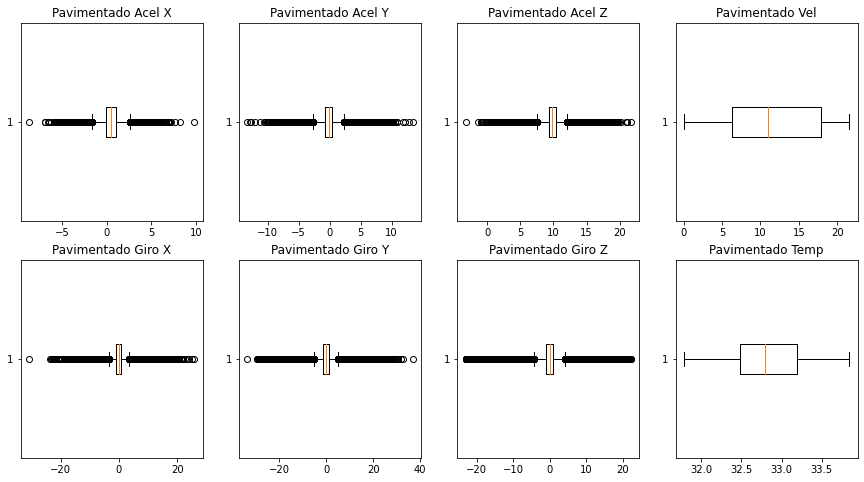

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(15,8))

ax1.boxplot(paved['acc_x_dashboard'], vert=False)
ax1.set_title('Pavimentado Acel X')

ax2.boxplot(paved['acc_y_dashboard'], vert=False)
ax2.set_title('Pavimentado Acel Y')

ax3.boxplot(paved['acc_z_dashboard'], vert=False)
ax3.set_title('Pavimentado Acel Z')

ax4.boxplot(paved['speed'], vert=False)
ax4.set_title('Pavimentado Vel')

ax5.boxplot(paved['gyro_x_dashboard'], vert=False)
ax5.set_title('Pavimentado Giro X')

ax6.boxplot(paved['gyro_y_dashboard'], vert=False)
ax6.set_title('Pavimentado Giro Y')

ax7.boxplot(paved['gyro_z_dashboard'], vert=False)
ax7.set_title('Pavimentado Giro Z')

ax8.boxplot(paved['temp_dashboard'], vert=False)
ax8.set_title('Pavimentado Temp')

plt.show()

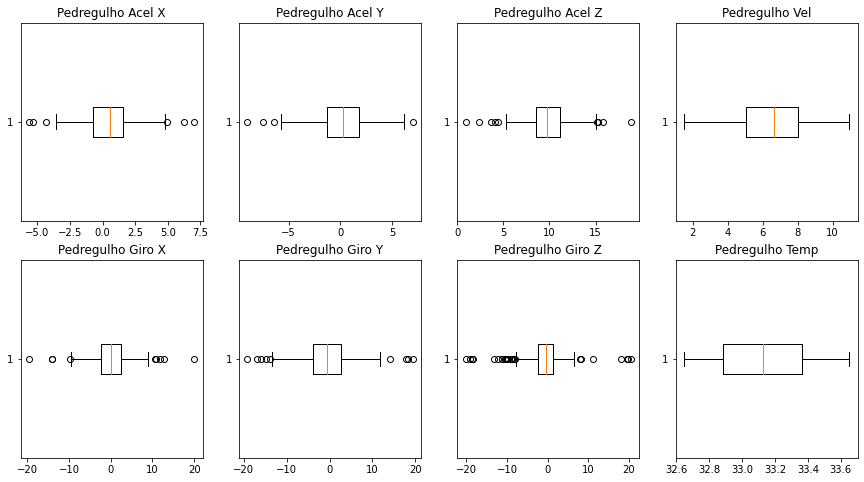

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(15,8))

ax1.boxplot(cobblestone['acc_x_dashboard'], vert=False)
ax1.set_title('Pedregulho Acel X')

ax2.boxplot(cobblestone['acc_y_dashboard'], vert=False)
ax2.set_title('Pedregulho Acel Y')

ax3.boxplot(cobblestone['acc_z_dashboard'], vert=False)
ax3.set_title('Pedregulho Acel Z')

ax4.boxplot(cobblestone['speed'], vert=False)
ax4.set_title('Pedregulho Vel')

ax5.boxplot(cobblestone['gyro_x_dashboard'], vert=False)
ax5.set_title('Pedregulho Giro X')

ax6.boxplot(cobblestone['gyro_y_dashboard'], vert=False)
ax6.set_title('Pedregulho Giro Y')

ax7.boxplot(cobblestone['gyro_z_dashboard'], vert=False)
ax7.set_title('Pedregulho Giro Z')

ax8.boxplot(cobblestone['temp_dashboard'], vert=False)
ax8.set_title('Pedregulho Temp')

plt.show()

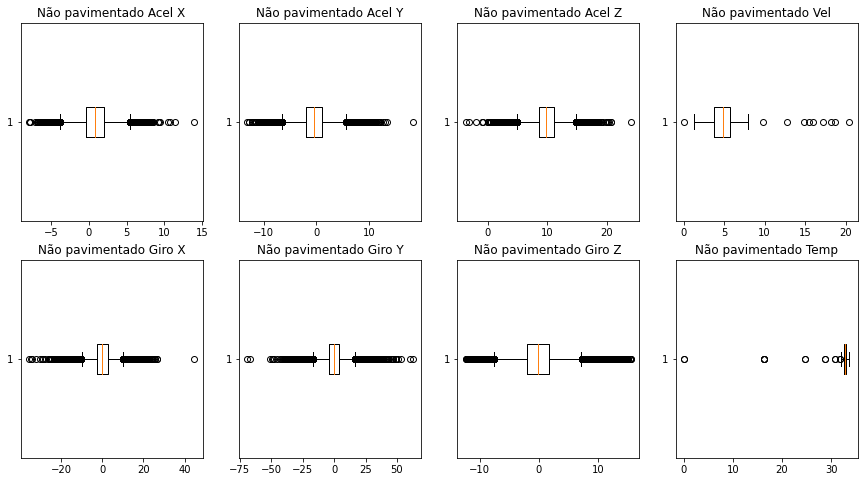

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(15,8))

ax1.boxplot(unpaved['acc_x_dashboard'], vert=False)
ax1.set_title('Não pavimentado Acel X')

ax2.boxplot(unpaved['acc_y_dashboard'], vert=False)
ax2.set_title('Não pavimentado Acel Y')

ax3.boxplot(unpaved['acc_z_dashboard'], vert=False)
ax3.set_title('Não pavimentado Acel Z')

ax4.boxplot(unpaved['speed'], vert=False)
ax4.set_title('Não pavimentado Vel')

ax5.boxplot(unpaved['gyro_x_dashboard'], vert=False)
ax5.set_title('Não pavimentado Giro X')

ax6.boxplot(unpaved['gyro_y_dashboard'], vert=False)
ax6.set_title('Não pavimentado Giro Y')

ax7.boxplot(unpaved['gyro_z_dashboard'], vert=False)
ax7.set_title('Não pavimentado Giro Z')

ax8.boxplot(unpaved['temp_dashboard'], vert=False)
ax8.set_title('Não pavimentado Temp')

plt.show()

Temperatura igual a 0? Gravação foi feita no Alaska? Bem provavel que sejam maus outliers.

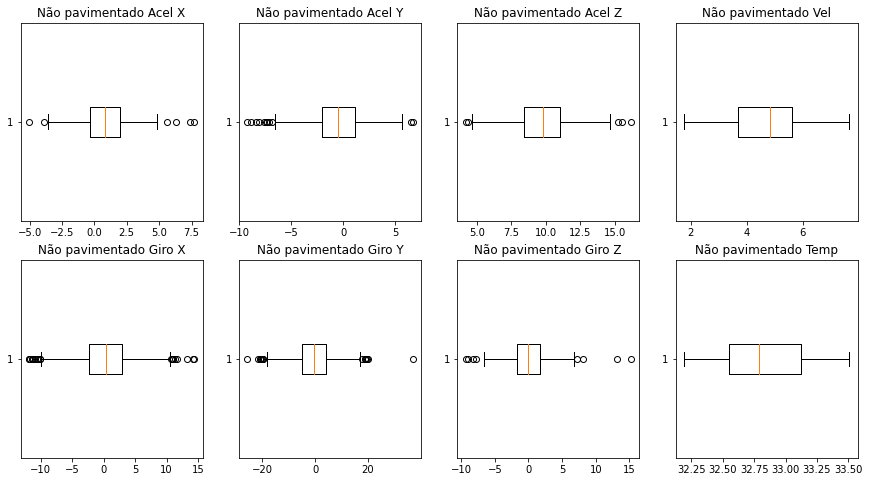

In [ ]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]) = plt.subplots(2, 4, figsize=(15,8))

ax1.boxplot(dirt['acc_x_dashboard'], vert=False)
ax1.set_title('Não pavimentado Acel X')

ax2.boxplot(dirt['acc_y_dashboard'], vert=False)
ax2.set_title('Não pavimentado Acel Y')

ax3.boxplot(dirt['acc_z_dashboard'], vert=False)
ax3.set_title('Não pavimentado Acel Z')

ax4.boxplot(dirt['speed'], vert=False)
ax4.set_title('Não pavimentado Vel')

ax5.boxplot(dirt['gyro_x_dashboard'], vert=False)
ax5.set_title('Não pavimentado Giro X')

ax6.boxplot(dirt['gyro_y_dashboard'], vert=False)
ax6.set_title('Não pavimentado Giro Y')

ax7.boxplot(dirt['gyro_z_dashboard'], vert=False)
ax7.set_title('Não pavimentado Giro Z')

ax8.boxplot(dirt['temp_dashboard'], vert=False)
ax8.set_title('Não pavimentado Temp')

plt.show()

Ao plotar esses monte de gráficos, notamos que há bastantes outliers. Mas será que são maus dados ou será que podemos de fato tirar algum proveito deles?

Observa-se que, nos tipos "Pavimentado" e "Não pavimentado" (pois são tipos predominantes em todo o dataset) possuem tantos outliers que fazem até uma linha preta na esquerda e na direita do boxplot. Esse padrão pode ser observado também nos outros tipos de pavimentação, mesmo que em pequenas quantidades, ainda sim é um padrão caso imaginássemos esses dados em grandes quantidades.

A conclusão é: esses pontos acima e abaixo do limite do boxplot são normais quando se trata de rua, porque cada estrada é uma estrada diferente, alguns com mais curvas, outros menos planos.

Infere-se, pelo óbvio, que as unidades localizadas ao extremo de cada gráfico são bem provavelmente outliers ruins que vão danificar o estudo desse dataset e, por esse motivo, o tratamento deles não pode ser evitado

Com certeza o tratamento não será perfeito, pois também pegaremos alguns "outliers bons", mas isso não vai alterar muito o resultado final

# 2.3) Tratando outliers

In [ ]:
# subalgoritmo que detecta os outliers e os armazena numa lista
def detect_outlier(df):
  outliers=[]
  threshold=3
  mean_1 = np.mean(df)
  std_1 = np.std(df)
  for idx, item in enumerate(df):
    z_score = (item - mean_1)/std_1 
    if np.abs(z_score) > threshold:
      outliers.append(idx)
  return outliers

In [ ]:
# salvando cada outlier de acordo com a coluna em cada tipo de pavimentacao
asphalt_speed = detect_outlier(paved['speed'])
asphalt_acc_x = detect_outlier(asphalt['acc_x_dashboard'])
asphalt_acc_y = detect_outlier(asphalt['acc_y_dashboard'])
asphalt_acc_z = detect_outlier(asphalt['acc_z_dashboard'])
asphalt_gyro_x = detect_outlier(asphalt['gyro_x_dashboard'])
asphalt_gyro_y = detect_outlier(asphalt['gyro_y_dashboard'])
asphalt_gyro_z = detect_outlier(asphalt['gyro_z_dashboard'])
asphalt_temp = detect_outlier(paved['temp_dashboard'])

paved_speed = detect_outlier(paved['speed'])
paved_acc_x = detect_outlier(paved['acc_x_dashboard'])
paved_acc_y = detect_outlier(paved['acc_y_dashboard'])
paved_acc_z = detect_outlier(paved['acc_z_dashboard'])
paved_gyro_x = detect_outlier(paved['gyro_x_dashboard'])
paved_gyro_y = detect_outlier(paved['gyro_y_dashboard'])
paved_gyro_z = detect_outlier(paved['gyro_z_dashboard'])
paved_temp = detect_outlier(paved['temp_dashboard'])

cobblestone_speed = detect_outlier(cobblestone['speed'])
cobblestone_acc_x = detect_outlier(cobblestone['acc_x_dashboard'])
cobblestone_acc_y = detect_outlier(cobblestone['acc_y_dashboard'])
cobblestone_acc_z = detect_outlier(cobblestone['acc_z_dashboard'])
cobblestone_gyro_x = detect_outlier(cobblestone['gyro_x_dashboard'])
cobblestone_gyro_y = detect_outlier(cobblestone['gyro_y_dashboard'])
cobblestone_gyro_z = detect_outlier(cobblestone['gyro_z_dashboard'])
cobblestone_temp = detect_outlier(cobblestone['temp_dashboard'])

unpaved_speed = detect_outlier(unpaved['speed'])
unpaved_acc_x = detect_outlier(unpaved['acc_x_dashboard'])
unpaved_acc_y = detect_outlier(unpaved['acc_y_dashboard'])
unpaved_acc_z = detect_outlier(unpaved['acc_z_dashboard'])
unpaved_gyro_x = detect_outlier(unpaved['gyro_x_dashboard'])
unpaved_gyro_y = detect_outlier(unpaved['gyro_y_dashboard'])
unpaved_gyro_z = detect_outlier(unpaved['gyro_z_dashboard'])
unpaved_temp = detect_outlier(unpaved['temp_dashboard'])

dirt_speed = detect_outlier(dirt['speed'])
dirt_acc_x = detect_outlier(dirt['acc_x_dashboard'])
dirt_acc_y = detect_outlier(dirt['acc_y_dashboard'])
dirt_acc_z = detect_outlier(dirt['acc_z_dashboard'])
dirt_gyro_x = detect_outlier(dirt['gyro_x_dashboard'])
dirt_gyro_y = detect_outlier(dirt['gyro_y_dashboard'])
dirt_gyro_z = detect_outlier(dirt['gyro_z_dashboard'])
dirt_temp = detect_outlier(dirt['temp_dashboard'])


In [ ]:
# organizando melhor as variaveis para os proximos codigos
sum_temp = asphalt_temp + paved_temp + cobblestone_temp + unpaved_temp + dirt_temp

sum_acc_x = asphalt_acc_x + paved_acc_x + cobblestone_acc_x + unpaved_acc_x + dirt_acc_x
sum_acc_y = asphalt_acc_y + paved_acc_y + cobblestone_acc_y + unpaved_acc_y + dirt_acc_y
sum_acc_z = asphalt_acc_z + paved_acc_z + cobblestone_acc_z + unpaved_acc_z + dirt_acc_z

sum_gyro_x = asphalt_gyro_x + paved_gyro_x + cobblestone_gyro_x + unpaved_gyro_x + dirt_gyro_x
sum_gyro_y = asphalt_gyro_y + paved_gyro_y + cobblestone_gyro_y + unpaved_gyro_y + dirt_gyro_y
sum_gyro_z = asphalt_gyro_z + paved_gyro_z + cobblestone_gyro_z + unpaved_gyro_z + dirt_gyro_z


sum_speed = asphalt_speed + paved_speed + cobblestone_speed + unpaved_speed + dirt_speed

In [ ]:
# copiando o dataset numa variavel diferente (tipo um backup para me organizar melhor dentro do codigo)
df_v2 = df_v1.copy()

In [ ]:
# substituindo agora os outliers por valores NaN
for item in sum_acc_x:
  df_v2.loc[[item],['acc_x_dashboard']] = np.nan
for item in sum_acc_y:
  df_v2.loc[[item],['acc_y_dashboard']] = np.nan
for item in sum_acc_z:
  df_v2.loc[[item],['acc_z_dashboard']] = np.nan

for item in sum_gyro_x:
  df_v2.loc[[item],['gyro_x_dashboard']] = np.nan
for item in sum_gyro_y:
  df_v2.loc[[item],['gyro_y_dashboard']] = np.nan
for item in sum_gyro_z:
  df_v2.loc[[item],['gyro_y_dashboard']] = np.nan

for item in sum_temp:
  df_v2.loc[[item],['temp_dashboard']] = np.nan
for item in sum_speed:
  df_v2.loc[[item],['speed']] = np.nan

In [ ]:
# visualizando os NaN
df_v2.isna().sum()

no_speed_bump          0
acc_x_dashboard     1474
acc_y_dashboard     2017
acc_z_dashboard     2168
gyro_x_dashboard    2527
gyro_y_dashboard    4741
gyro_z_dashboard       0
temp_dashboard        12
speed                 10
road                   0
dtype: int64

In [ ]:
road_raw_mean.head()

,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
road,,,,,,,,
asphalt,0.514057,-0.263484,9.824061,0.037510,-0.052077,-0.120960,32.726167,13.838838
paved,0.501764,-0.172332,9.827872,0.036566,-0.063805,-0.271413,32.833376,11.743367
cobblestone,0.458877,0.139804,9.786915,0.173588,-0.541779,-0.923684,33.128025,6.569799
unpaved,0.825555,-0.361434,9.831771,-0.017823,-0.090419,-0.064278,32.823100,4.741807
dirt,0.835397,-0.498504,9.671255,0.360583,-0.348698,0.087464,32.814889,4.689771


In [ ]:
road_v2_mean = df_v2.drop(columns=['no_speed_bump']).groupby('road').mean().sort_values(by = 'speed', ascending=False)
road_v2_mean

,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
road,,,,,,,,
asphalt,0.514081,-0.267705,9.823624,0.037276,-0.046973,-0.120960,32.726167,13.838838
paved,0.500617,-0.173956,9.827977,0.036478,-0.064159,-0.271413,32.833376,11.743663
cobblestone,0.458877,0.139804,9.786915,0.173588,-0.541779,-0.923684,33.128025,6.569799
unpaved,0.822248,-0.365296,9.834216,-0.022003,-0.099361,-0.064278,32.823133,4.741972
dirt,0.839155,-0.499057,9.673727,0.303414,-0.512060,0.087464,32.814889,4.691964


Como podemos ver, não teve drásticas mudanças no dataset com todo o tratamento dos outliers. Mas como havia dito, é uma boa prática. Pelo menos temos uma certeza de que, se usarmos um modelo de Machine Learning e a acurácia estiver baixa, dificilmente vai ser problema de outliers. 

In [ ]:
# quase o mesmo codigo para substituir os NaN pelas suas medias em cada tipo de rua
numbers = []

df_v3 = df_v2.copy()

for idx, rows in road_v2_mean.iterrows():
  my_list = [rows.acc_x_dashboard, rows.acc_y_dashboard, rows.acc_z_dashboard,
             rows.gyro_x_dashboard, rows.gyro_y_dashboard, rows.gyro_z_dashboard,
             rows.temp_dashboard, rows.speed]
  numbers.append(my_list)

for i in roads_type:
    for k in numbers:
        for j in columns_name:
            for w in k:
                df_v3.update(df_v3[df_v3['road']==i][j].fillna(w))
                del k[0]
                break
        if not k:
            numbers = [x for x in numbers if x]
            break

In [ ]:
# conferindo novamente se o comando anterior deu certo
df_v3.isna().sum()

no_speed_bump       0
acc_x_dashboard     0
acc_y_dashboard     0
acc_z_dashboard     0
gyro_x_dashboard    0
gyro_y_dashboard    0
gyro_z_dashboard    0
temp_dashboard      0
speed               0
road                0
dtype: int64

# 3) Aprendizado de máquina usando regressão

Nessa parte, após todos os tratamentos feitos no dataset, vamos começar a botar em prática o machine learning.

Como diz no comando da questão, precisamos prever a velocidade do veículo de acordo com a sua movimentação. O primeiro passo para isso é escolher o melhor modelo de ML para tentar fazer as previsões.

In [ ]:
#sns.pairplot(df_v3) # esse comando foi usado para ver se havia alguns agrupamentos e ver se o clustering seria uma boa opcao,
                     # com o tanto de dataset e organização estar todas quase juntas isso nao foi possivel de seguir

Para prosseguir com o treinamento, ainda precisamos organizar algumas coisas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_v4 = df_v3.copy()

hot_enc = OneHotEncoder()

enc_data = pd.DataFrame(hot_enc.fit_transform(df_v3[['road']]).toarray())

df_v4 = df_v3.join(enc_data)
df_v4.columns = ['no_speed_bump', 'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard',
                 'gyro_x_dashboard', 'gyro_y_dashboard', 'gyro_z_dashboard',
                 'temp_dashboard', 'speed', 'road',
                 'type_asphalt', 'type_cobblestone', 'type_dirt', 'type_paved', 'type_unpaved']


Foi usado o one hot encoder ao inves do label, porque, embora crie mais colunas, a quantidade (5) é pouca quando comparado ao risco de o algoritmo de aprendizado confundir os números (0 a 4) com algum tipo de nível ao invés de números categóricos.

In [ ]:
df_v4

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road,type_asphalt,type_cobblestone,type_dirt,type_paved,type_unpaved
0,1.0,-0.029431,-0.019621,9.781015,-0.122070,-0.064159,-0.112208,32.166023,11.743663,paved,0.0,0.0,0.0,1.0,0.0
1,1.0,-0.039008,0.009110,9.819322,-0.030518,-0.064159,-0.051173,32.453560,11.743663,paved,0.0,0.0,0.0,1.0,0.0
2,1.0,0.010073,0.005518,9.777423,-0.122070,-0.064159,-0.020655,32.405637,0.010822,paved,0.0,0.0,0.0,1.0,0.0
3,1.0,0.020847,0.028263,9.785803,0.061035,-0.064159,-0.112208,32.453560,0.010822,paved,0.0,0.0,0.0,1.0,0.0
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,-0.064159,-0.112208,32.309791,0.010822,paved,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124679,1.0,0.427861,-0.261435,9.958185,0.030518,-0.006327,0.070898,32.070177,0.023570,paved,0.0,0.0,0.0,1.0,0.0
124680,1.0,0.466169,-0.316502,9.867206,-0.122070,-0.082621,-0.020655,32.094138,0.023570,paved,0.0,0.0,0.0,1.0,0.0
124681,1.0,0.332093,-0.555922,9.646939,-0.183105,-0.067362,0.101415,32.261868,0.023570,paved,0.0,0.0,0.0,1.0,0.0
124682,1.0,0.339276,-0.570287,9.824110,-0.122070,-0.006327,-0.173243,32.070177,0.023570,paved,0.0,0.0,0.0,1.0,0.0


Agora que já inserimos o OneHotEncoding, vamos definir as features e labels dos treinamentos. A coluna "speed" vai ser a que queremos prever, e utilizaremos as outras colunas como features.

In [ ]:
from sklearn.model_selection import train_test_split

a = df_v4[['type_asphalt', 'type_paved', 'type_cobblestone', 'type_unpaved', 'type_dirt',
           'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard', 'no_speed_bump',
           'gyro_x_dashboard', 'gyro_y_dashboard', 'gyro_z_dashboard', 'temp_dashboard']]
b = df_v4['speed']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 100)


Como boa prática, vamos escalonar os dados usando o MinMaxScaler.

A ideia de usar esse procedimento foi porque já melhoramos os outliers anteriormente e, dessa maneira, usar a técnica do StandardScale não faria muito sentido. Além desse motivo, usar o minmax altera os valores das colunas numéricas para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(a_train)

a_train_scaled = scaler.transform(a_train)
a_test_scaled = scaler.transform(a_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(a_train_scaled,b_train)

RandomForestRegressor()

In [ ]:
# salvando as predicoes numa outra variavel
b_predictions = rfr.predict(a_test_scaled)
b_predictions

array([ 5.36191151,  4.88732459, 12.74162974, ..., 20.42035508,
        5.4403744 ,  5.60160617])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

R2 = r2_score(y_true = b_test,      # Gabarito
              y_pred = b_predictions) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = b_test,      # Gabarito
                          y_pred = b_predictions) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = b_test,      # Gabarito
                         y_pred = b_predictions) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

rho = pearsonr(b_test, b_predictions)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor

R2:  0.84249561213291
MAE:  1.5936751161824576
MSE:  6.21957402508507
raiz MSE:  2.493907381015797
ρ: 0.9180120166567836


Ao final das análises, pode-se ver que o R² deu aproximadamente 83%. Há outros valores de saída no código anterior, mas vamos nos concentrar no R² que é o mais compreensível.

Grande parte da acurácia nesse modelo, foi majoritariamente devido a inserção de todas as colunas, exceto a "speed" (porque foi a label), nas features e à biblioteca usada: RandomForestRegressor. 

Foi testado também LinearRegressor, DecisionTreeRegressor e até redes neurais MLP Regressor, mas nenhuma delas obteve um valor satisfatório, igual ou superior ao de RandomForest.

Limpeza de outliers, por incrivel que pareça, não aumentou muito o score final (menos de 1%). Ao trocar o random state no training, a normalização aumentou uma pequena porcentagem, diferente da padronização que não surtiu muito efeito.

Vamos tentar visualizar melhor onde a máquina está tendo dificuldades em prever.

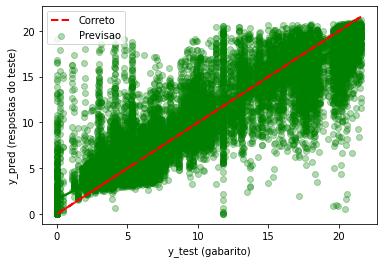

In [ ]:
import seaborn as sns

# visao geral dos acertos da maquina
ax1 = sns.regplot(x = b_test,y = b_predictions,
                 color="g", scatter_kws={'alpha':0.3}, label='Previsao')
ax1.plot(b_test, b_test, 'r--', linewidth = 2, label='Correto')
ax1.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax1.legend()

(None, None)

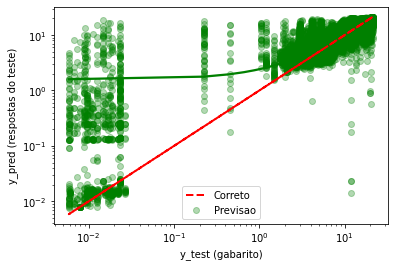

In [ ]:
# dando um zoom na parte que a inteligencia acertou menos
ax = sns.regplot(x = b_test,y = b_predictions,
                 color="g", scatter_kws={'alpha':0.3}, label='Previsao')
ax.plot(b_test, b_test, 'r--', linewidth = 2, label='Correto')
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax.legend()
ax.set_xscale('log'), ax.set_yscale('log')

Notamos que grande parte dos erros de previsões da máquina se concentram no início dos eixos do gráfico. 

A suposição é que isso pode ser do próprio funcionamento do RandomForest que trabalha criando árvores de decisões com base numa seleção inicial e aleatória de dados e, assim, junto com inconstâncias ou faltas de dados no dataset, acaba criando uma lacuna nessa parte do gráfico, prejudicando o seu desempenho.

# 4) Aprendizado de máquina usando classificação

Mais um modelo ML que vai usar método de classificação. Entretanto, esse modelo não tem muita relação ao que se pede no comando do trabalho, mas ainda assim é interessante avaliar.

In [ ]:
# tirar a media de cada coluna de acordo com o tipo de estrada
df_v4.drop(columns=['no_speed_bump', 'type_asphalt', 'type_cobblestone', 'type_dirt', 'type_paved', 'type_unpaved']).groupby('road').mean().sort_values(by = 'speed', ascending=False)

,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed
road,,,,,,,,
asphalt,0.514081,-0.267705,9.823624,0.037276,-0.046973,-0.120960,32.726167,13.838838
paved,0.500617,-0.173956,9.827977,0.036478,-0.064159,-0.271413,32.833376,11.743663
cobblestone,0.458877,0.139804,9.786915,0.173588,-0.541779,-0.923684,33.128025,6.569799
unpaved,0.822248,-0.365296,9.834216,-0.022003,-0.099361,-0.064278,32.823133,4.741972
dirt,0.839155,-0.499057,9.673727,0.303414,-0.512060,0.087464,32.814889,4.691964


Após os resultados do último código, há uma certa relação da média de velocidade com o tipo de estrada. Iremos plotar um gráfico logo logo a respeito disso.

In [ ]:
# comando para ver a quantidade de registros dentro de cada tipo de pavimentacao
df_v4['road'].value_counts()

paved          79263
unpaved        44177
asphalt          594
dirt             451
cobblestone      199
Name: road, dtype: int64

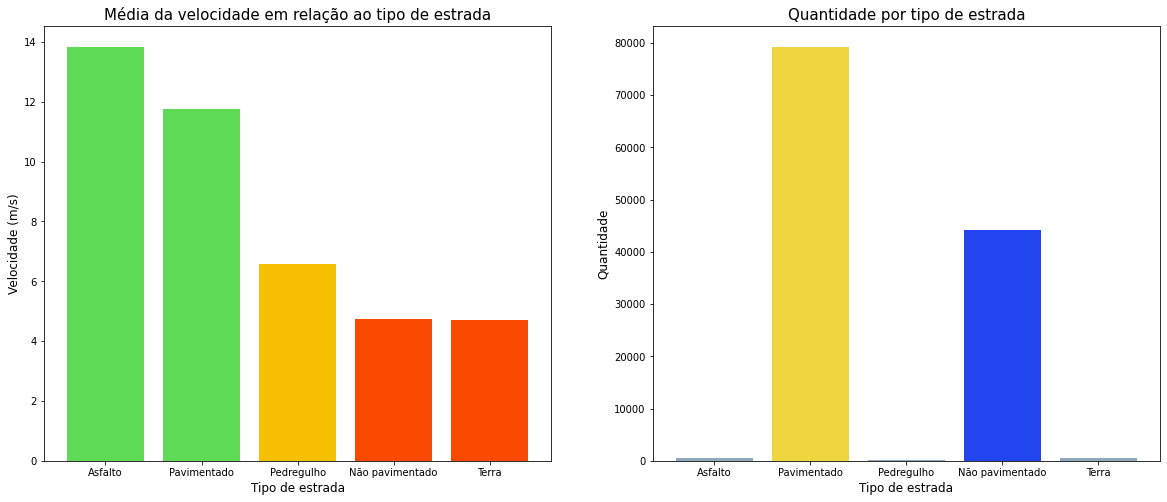

In [ ]:
road = ['Asfalto', 'Pavimentado', 'Pedregulho', 'Não pavimentado', 'Terra']
speed = [13.838838, 11.743663, 6.569799, 4.741972, 4.691964]
counts = [594, 79263, 199, 44177, 451]


fig, ([ax1, ax2]) = plt.subplots(1, 2, figsize=(20,8))

ax1.bar(road, speed, color=['#5eda54', '#5eda54', '#F5C000', '#FA4900', '#FA4900'])
ax1.set_ylabel('Velocidade (m/s)', fontsize = 12)
ax1.set_xlabel('Tipo de estrada', fontsize = 12)
ax1.set_title('Média da velocidade em relação ao tipo de estrada', fontsize = 15)

ax2.bar(road, counts, color=['#8FA8BF', '#F0D63E', '#8FA8BF', '#2345F0', '#8FA8BF'])
ax2.set_ylabel('Quantidade', fontsize = 12)
ax2.set_xlabel('Tipo de estrada', fontsize = 12)
ax2.set_title('Quantidade por tipo de estrada', fontsize = 15)

plt.show()

1) De acordo com o primeiro gráfico, demonstra uma maior média de velocidade em estradas com uma pavimentação mais moderna. Isso se deve justamente pelo tipo da rua, pois em estradas de terra ou não pavimentadas, por exemplo, além de terem relevos inconstantes, o nível de aderência na de terra é menor, fazendo o carro perder muita velocidade.

2)Com esse segundo gráfico, infere-se que, embora as estradas pavimentadas sejam a de maior número, a não pavimentada apenas perde por metade. Isso é preocupante, pois se relacionarmos os dois gráficos, observamos que a grande quantidade de estradas não pavimentadas pode implicar diretamente no próprio engarrafamento no trânsito por ser mais lenta. Não só isso, mas com esse tipo de pavimentação, deteriora mais as peças de movimentação do carro por causa de seu relevo inconstante, podendo aumentar os índices de acidentes
.

Apesar de relacionarmos o tipo de estrada com a sua respectiva velocidade média, ainda surge uma dúvida: será que as lombadas realmente são eficazes para conter velocidade e evitar possíveis acidentes?

In [ ]:
# trocando os valores numericos da coluna "no_speed_bump" por categóricos
df_v4['no_speed_bump'] = df_v4['no_speed_bump'].replace([1], 'no_bump')
df_v4['no_speed_bump'] = df_v4['no_speed_bump'].replace([0], 'bump')
print(df_v4)

       no_speed_bump  acc_x_dashboard  acc_y_dashboard  acc_z_dashboard  \
0            no_bump        -0.029431        -0.019621         9.781015   
1            no_bump        -0.039008         0.009110         9.819322   
2            no_bump         0.010073         0.005518         9.777423   
3            no_bump         0.020847         0.028263         9.785803   
4            no_bump        -0.003095        -0.017227         9.800168   
...              ...              ...              ...              ...   
124679       no_bump         0.427861        -0.261435         9.958185   
124680       no_bump         0.466169        -0.316502         9.867206   
124681       no_bump         0.332093        -0.555922         9.646939   
124682       no_bump         0.339276        -0.570287         9.824110   
124683       no_bump         0.439832        -0.201580        10.101838   

        gyro_x_dashboard  gyro_y_dashboard  gyro_z_dashboard  temp_dashboard  \
0              -0.1

no_bump significa "sem lombada" e bump, "com lombada". Essa alteração foi necessária para usarmos o modelo de classificação no aprendizado de máquina a fim de tentar relacionar e prever valores com e sem lombada.

In [ ]:
x = df_v4[['speed', 'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard']] #colunas preditivas
y = df_v4['no_speed_bump'] #coluna alvo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

A mesma lógica descrita no modelo de regressão: MinMaxScaler foi usado porque já tinhamos tratado os outliers, visto que o StandardScaler faz muito bem essa função.

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

rfc = RandomForestClassifier()  # criamos o objeto do classificador

rfc.fit(x_train_scaled,y_train) # treinamos o classificador passando apenas o conjunto de dados de treinamento 

RandomForestClassifier()

In [ ]:
y_predictions = rfc.predict(x_test_scaled)

y_predictions

array(['no_bump', 'no_bump', 'no_bump', ..., 'no_bump', 'no_bump',
       'no_bump'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

        bump       0.94      0.67      0.78       415
     no_bump       0.99      1.00      1.00     24522

    accuracy                           0.99     24937
   macro avg       0.96      0.83      0.89     24937
weighted avg       0.99      0.99      0.99     24937



Essa precisão alta pode ser explicada por duas coisas: pelo próprio método usado, RandomForestClassifier, pois esse algoritmo funciona melhor quando a coluna alvo é categórica; já o outro é porque de fato, a lombada tem relação direta com a velocidade nos veículos.

In [ ]:
bump_mean = df_v4[['speed', 'no_speed_bump']].groupby('no_speed_bump').mean().sort_values(by = 'speed', ascending=False)
bump_mean

,speed
no_speed_bump,
no_bump,9.307923
bump,4.989216


# sensor_readings_24.csv

O robô SCITOS G5 foi objeto de estudo de um modelo de um robô que
segue parede de forma autônoma. Nesse estudo foram coletados dados dos
24 sensores ultrassônicos instalados ao redor do robô (ver Figura 1)
O objetivo do robô era conseguir seguir uma parede evitando eventuais
colisões. Esse robô foi testado com diversos algoritmos e os dados dos valores
desses sensores, assim como o movimento que o robô deveria fazer, foram armazenados em um conjunto de dados. A imagem a seguir ilustra as rotas
realizadas pelo robô.

A seguir temos uma descrição dos diversos sensores do robô instalados no
robô:
1. US1: Sensor ultrassônico na parte frontal do robô (ângulo de referência:
180°) - (numeric: real)
2. US2: Leitura do sensor ultrassônico (ângulo de referência: -165°) -
(numeric: real)
3. US3: Leitura do sensor ultrassônico (ângulo de referência: -150°) -
(numeric: real)
4. US4: Leitura do sensor ultrassônico (ângulo de referência: -135°) -
(numeric: real)
5. US5: Leitura do sensor ultrassônico (ângulo de referência: -120°) -
(numeric: real)
6. US6: Leitura do sensor ultrassônico (ângulo de referência: -105°) -
(numeric: real)
7. US7: Leitura do sensor ultrassônico (ângulo de referência: -90°) - (numeric:
real)
8. US8: Leitura do sensor ultrassônico (ângulo de referência: -75°) - (numeric:
real)
9. US9: Leitura do sensor ultrassônico (ângulo de referência: -60°) - (numeric:
real)
10. US10: Leitura do sensor ultrassônico (ângulo de referência: -45°) -
(numeric: real)
11. US11: Leitura do sensor ultrassônico (ângulo de referência: -30°) -
(numeric: real)
12. US12: Leitura do sensor ultrassônico (ângulo de referência: -15°) -
(numeric: real)
13. US13: Sensor ultrassônico na parte traseira do robô t (ângulo de
referência: 0°) - (numeric: real)
14. US14: Leitura do sensor ultrassônico (ângulo de referência: 15°) -
(numeric: real)
15. US15: Leitura do sensor ultrassônico (ângulo de referência: 30°) -
(numeric: real)
16. US16: Leitura do sensor ultrassônico (ângulo de referência: 45°) -
(numeric: real)
17. US17: Leitura do sensor ultrassônico (ângulo de referência: 60°) -
(numeric: real)
18. US18: Leitura do sensor ultrassônico (ângulo de referência: 75°) -
(numeric: real)
19. US19: Leitura do sensor ultrassônico (ângulo de referência: 90°) -
(numeric: real)
20. US20: Leitura do sensor ultrassônico (ângulo de referência: 105°) -
(numeric: real)
21. US21: Leitura do sensor ultrassônico (ângulo de referência: 120°) -
(numeric: real)
22. US22: Leitura do sensor ultrassônico (ângulo de referência: 135°) -
(numeric: real)
23. US23: Leitura do sensor ultrassônico (ângulo de referência: 150°) -
(numeric: real)
24. US24: Leitura do sensor ultrassônico (ângulo de referência: 165°) -
(numeric: real)
25. Classes (target):
-- Move-Forward - Mover para frente
-- Slight-Right-Turn - Curva leve à direita
-- Sharp-Right-Turn - Curva acentuada à direita
-- Slight-Left-Turn - Curva leve à direita
Sua equipe deve criar um modelo que possa estimar as classes de
movimentos dos robôs (Move-Foward, Slight-Right-Turn, Sharp-Right-Turn e Slight-Left-Turn) para verificar se podemos usar uma IA para resolver o mesmo
problema do carro autônomo.

# 1) Tratamento e análise exploratória

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# abrindo o dataframe
df_sensor = pd.read_csv('/content/sensor_readings_24.csv', encoding='UTF-8', sep=',')
df_sensor.head(54809)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


Antes de tudo, vamos analisar o dataframe acima e ver se realmente os registros possuem algum tipo de outlier.

Pode-se perceber que os valores dos sensores aumentam e diminuem gradativamente, variando numa escala de 0 a 5. O tratamento de outliers vai acontecer na hora da padronização dos dados.

In [ ]:
# comando para conferir se tem valores faltantes
df_sensor.isnull().sum()

sensor_1       14
sensor_2       14
sensor_3       14
sensor_4       14
sensor_5       14
sensor_6       14
sensor_7       14
sensor_8       14
sensor_9       14
sensor_10      14
sensor_11      14
sensor_12      14
sensor_13      14
sensor_14      14
sensor_15      14
sensor_16      14
sensor_17      14
sensor_18      14
sensor_19      14
sensor_20      14
sensor_21      14
sensor_22      14
sensor_23      14
sensor_24      14
funcao_robo    14
dtype: int64

Vamos tentar olhar mais de perto se tem algum padrão nos dados NaN

In [ ]:
# comando para ver somente as linhas e colunas com algum dado faltante
df_sensor_nan = df_sensor[df_sensor.isnull().any(axis=1)]
df_sensor_nan

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
27,0.481,0.511,5.023,3.665,2.954,2.937,2.941,2.627,1.707,2.312,...,0.687,0.545,0.475,0.475,0.504,0.463,0.458,0.470,0.477,Slight-Right-Turn
30,0.482,0.525,0.524,3.665,2.953,2.940,2.940,2.630,1.709,2.311,...,0.563,0.542,0.475,0.476,0.488,0.464,0.459,0.468,0.478,Slight-Right-Turn
94,1.213,1.246,1.271,4.666,4.075,5.000,2.776,2.750,2.499,1.650,...,0.893,1.165,0.828,0.661,0.652,0.662,5.000,1.176,1.172,Sharp-Right-Turn
95,1.227,1.263,NaN,4.668,4.098,5.000,2.769,2.743,2.487,1.634,...,0.876,0.906,0.823,0.671,0.658,0.669,0.829,1.197,1.193,Sharp-Right-Turn
107,1.249,1.269,1.318,1.335,4.896,4.763,5.000,2.733,2.467,2.453,...,0.851,1.127,1.127,0.687,0.664,0.696,0.777,5.000,1.239,Sharp-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5381,2.227,1.817,1.803,1.501,1.274,1.266,NaN,1.323,1.185,0.931,...,0.982,0.857,0.849,5.000,4.408,3.647,5.000,2.608,2.599,Sharp-Right-Turn
5399,2.617,2.608,2.252,1.853,1.839,1.547,1.315,1.303,1.314,1.601,...,0.857,0.873,0.940,0.820,0.810,0.868,4.403,3.627,5.000,NaN
5423,4.847,3.620,5.000,2.646,2.642,NaN,1.917,1.891,4.857,1.386,...,0.793,0.790,0.798,0.884,0.849,0.885,5.000,0.703,5.000,Sharp-Right-Turn
5436,4.454,3.705,3.741,2.683,2.673,2.717,2.497,1.341,1.317,1.293,...,0.760,0.749,0.759,5.000,0.903,5.000,2.799,2.005,NaN,Move-Forward


Se repararmos, vemos que, conforme vai descendo as linhas, os números dos sensores aumentam ou diminuem gradualmente. Sendo assim, eliminar os valores faltantes não afetará muito os resultados finais

In [ ]:
df_sensor_nan.shape

(341, 25)

De um total de 5400 linhas, eliminar 341 não vai afetar muito os resultados finais (visto que mesmo perdendo uma linha inteira de dados, ainda temos uma linha antes e depois da eliminada para a máquina não se perder nos valores).

In [ ]:
df_sensor_v1 = df_sensor.dropna()

In [ ]:
# conferir se há algum dado faltante
df_sensor_v1.isna().sum()

sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
sensor_22      0
sensor_23      0
sensor_24      0
funcao_robo    0
dtype: int64

# 2) Aprendizado de máquina usando regressão

O correto seria recorrer logo de começo no de classificação, mas vamos ver qual vai ser a precisão usando o de regressão?

In [ ]:
df_sensor_v2 = df_sensor_v1

Nessa parte, houve uma tentativa de usar o OneHotEncoding para separar entre colunas os tipos de funcao_robo. Porém, o resultado disso aparentou acrescentar alguns dados faltantes e, assim sendo, foi preferido fazer o LabelEncoding, mas o fiz de uma maneira mais manual. 

In [ ]:
df_sensor_v2['funcao_robo'] = df_sensor_v2['funcao_robo'].replace(['Slight-Right-Turn'], 0)
df_sensor_v2['funcao_robo'] = df_sensor_v2['funcao_robo'].replace(['Move-Forward'], 1)
df_sensor_v2['funcao_robo'] = df_sensor_v2['funcao_robo'].replace(['Sharp-Right-Turn'], 2)
df_sensor_v2['funcao_robo'] = df_sensor_v2['funcao_robo'].replace(['Slight-Left-Turn'], 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_sensor_v2

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,0
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,0
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,0
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,0
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,1
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,2
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,2
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,1


In [ ]:
l = df_sensor_v2.drop(columns=['funcao_robo']) #colunas preditivas
m = df_sensor_v2['funcao_robo'] #coluna alvo

l_train, l_test, m_train, m_test = train_test_split(l, m, test_size = 0.2, random_state = 50)

Nessa parte, vamos padronizar os dados a fim de tentar eliminar os outliers do dataframe.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(l_train)

l_train_scaled = scaler.transform(l_train)
l_test_scaled = scaler.transform(l_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(l_train_scaled, m_train)

RandomForestRegressor()

In [ ]:
# salvando as predicoes numa outra variavel
m_predictions = rfr.predict(l_test_scaled)
m_predictions

array([2.  , 1.  , 0.  , ..., 0.98, 2.  , 2.  ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

R2 = r2_score(y_true = m_test,      # Gabarito
              y_pred = m_predictions) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = m_test,      # Gabarito
                          y_pred = m_predictions) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = m_test,      # Gabarito
                         y_pred = m_predictions) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

rho = pearsonr(m_test, m_predictions)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor

R2:  0.9835280005333272
MAE:  0.016422287390029325
MSE:  0.011096578690127078
raiz MSE:  0.10534029945907254
ρ: 0.9917769176955475


O R² deu um valor satisfatório devido ao uso correto das labels e features e ao algoritmo RandomForestRegressor.

# 3) Aprendizado de máquina usando classificação

Agora vamos para o modelo inicialmente planejado que provavelmente vai ter uma acurácia maior.

In [ ]:
from sklearn.model_selection import train_test_split


j = df_sensor_v1.drop(columns = 'funcao_robo')
k = df_sensor_v1['funcao_robo']
j_train, j_test, k_train, k_test = train_test_split(j, k, test_size = 0.2, random_state = 42)

Nessa parte, vamos padronizar os dados a fim de tentar eliminar os outliers do dataframe.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(j_train)

j_train_scaled = scaler.transform(j_train)
j_test_scaled = scaler.transform(j_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(j_train,k_train)

RandomForestClassifier()

In [ ]:
k_predicoes = rfc.predict(j_test)
k_predicoes

array([1, 3, 0, ..., 1, 0, 2])

In [ ]:
from sklearn.metrics import classification_report

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(k_test, k_predicoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       173
           1       1.00      0.99      1.00       411
           2       0.99      1.00      1.00       388
           3       1.00      0.98      0.99        51

    accuracy                           1.00      1023
   macro avg       1.00      0.99      0.99      1023
weighted avg       1.00      1.00      1.00      1023



A acurácia foi satisfatória devido ao modelo de Machine Learning utilizado. O RandomForest funciona melhor quando a coluna alvo é categórica.

Essa precisão também indica que há uma relação entre as features e labels e por causa disso a máquina conseguiu relacionar.